In [58]:
# import packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import math as math 
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
%matplotlib inline
pd.options.display.max_rows = 10

In [3]:
# import own data 
finalfinal_meta3 = pd.read_csv('finalfinal_meta3.csv', header=0,index_col=None, encoding='latin1')
finalfinal_meta3

,IMDB_Title,IMDB_Year,URL,IMDB_ID,IMDB_User_Rating,Action,Comedy,Drama,Crime,Fantasy,...,Discrepancy,budget,gross,budget_cur,gross_cur,budget_usd,gross_usd,budget_trueusd,gross_trueusd,success
0,The Dogs of War,1980.0,http://www.imdb.com/title/tt0080641,tt0080641,6.3,1.0,0.0,1.0,0.0,0.0,...,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Spring Breakers,2012.0,http://www.imdb.com/title/tt2101441,tt2101441,5.3,1.0,0.0,1.0,1.0,0.0,...,0.9,"$5,000,000","$14,123,773",$,$,5000000.0,14123773.0,5000000.0,14123773.0,2.824755
2,The Newton Boys,1998.0,http://www.imdb.com/title/tt0120769,tt0120769,6.0,1.0,0.0,1.0,1.0,0.0,...,0.3,"$27,000,000","$10,297,897",$,$,27000000.0,10297897.0,27000000.0,10297897.0,0.381404
3,Blue Thunder,1983.0,http://www.imdb.com/title/tt0085255,tt0085255,6.3,1.0,0.0,1.0,1.0,0.0,...,0.1,"$22,000,000","$42,300,000",$,$,22000000.0,42300000.0,22000000.0,42300000.0,1.922727
4,Cleopatra Jones,1973.0,http://www.imdb.com/title/tt0069890,tt0069890,5.8,1.0,0.0,0.0,1.0,0.0,...,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7112,Manos: The Hands of Fate,1966.0,http://www.imdb.com/title/tt0060666,tt0060666,1.9,0.0,0.0,0.0,0.0,0.0,...,2.1,"$19,000",NaN,$,NaN,19000.0,NaN,19000.0,NaN,NaN
7113,United Passions,2014.0,http://www.imdb.com/title/tt2814362,tt2814362,2.0,0.0,0.0,1.0,0.0,0.0,...,2.2,"$25,000,000",NaN,$,NaN,25000000.0,NaN,25000000.0,NaN,NaN
7114,The Starving Games,2013.0,http://www.imdb.com/title/tt2403029,tt2403029,3.3,0.0,1.0,0.0,0.0,0.0,...,3.2,"$4,500,000",NaN,$,NaN,4500000.0,NaN,4500000.0,NaN,NaN
7115,Smokey and the Bandit Part 3,1983.0,http://www.imdb.com/title/tt0086325,tt0086325,3.2,0.0,1.0,0.0,1.0,0.0,...,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exercise 3.1

In [13]:
# Predict only using constant of ones in linear model 

y = finalfinal_meta3.RT_Audience_2
X = np.ones([len(y),1])
model = sm.OLS(y, X) 
fit = model.fit() 
fit.summary () 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          RT_Audience_2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Sun, 16 Oct 2016   Prob (F-statistic):                nan
Time:                        17:45:04   Log-Likelihood:                -8434.8
No. Observations:                7117   AIC:                         1.687e+04
Df Residuals:                    7116   BIC:                         1.688e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.2062      0.009    661.412      0.000         6.188     6.225
==============================================================================
Omnibus:                       45.785   Durbin-Watson:                   1.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.261
Skew:                          -0.107   Prob(JB):                     2.23e-13
Kurtosis:                       3.388   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As evident from the results above, the R^2 is 0, demonstrating that the model accounts for no variance in the outcome. This model demonstrates that average values of predictive variables (when all predictive variables are average in value) are associated with average Rotten Tomatoes user ratings.

In [5]:
y_pred = fit.predict(X)
print(metrics.r2_score(y, y_pred))

0.0


The 0 r-squared value demonstrates that we have not extracted any information from the model. 

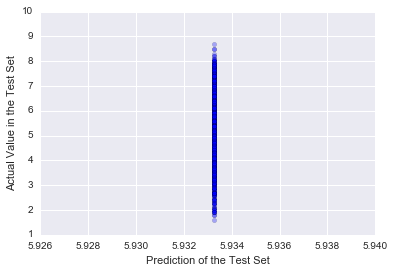

In [6]:
# Plot 
plt.scatter(y_pred, y, alpha = .3)
plt.xlabel('Prediction of the Test Set')
plt.ylabel('Actual Value in the Test Set');

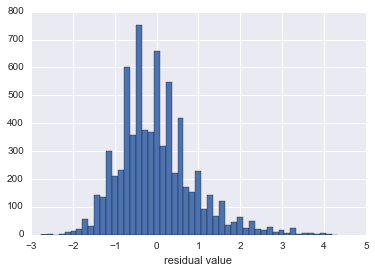

In [7]:
# Residual variables plot 

plt.hist(y_pred-y,bins = 50)
plt.xlabel('residual value');

The residuals are simply the distribution of the Z-scores of IMBD user ratings. 

## Exercise 3.2 

In [17]:
y = finalfinal_meta3.RT_Audience_2
ones = (finalfinal_meta3.Action*0+1)
ones = ones.rename('bias')
X = pd.concat([ones, finalfinal_meta3.IMDB_User_Rating], axis=1)
model = sm.OLS(y, X) 
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          RT_Audience_2   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     8971.
Date:                Sun, 16 Oct 2016   Prob (F-statistic):               0.00
Time:                        17:46:13   Log-Likelihood:                -5531.9
No. Observations:                7117   AIC:                         1.107e+04
Df Residuals:                    7115   BIC:                         1.108e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
bias                 2.3756      0.041     58.052      0.000         2.295     2.456
IMDB_User_Rating     0.6456      0.007     94.717      0.000         0.632     0.659
==============================================================================
Omnibus:                     1326.099   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5371.642
Skew:                           0.874   Prob(JB):                         0.00
Kurtosis:                       6.880   Cond. No.                         40.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
y_pred = fit.predict(X)
print(metrics.r2_score(y, y_pred))

0.557700117772


As demonstrated, the r-squared score is improved. 

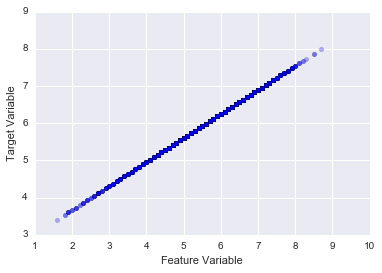

In [19]:
# Linear plot of Feature Variable and Target Variable 
plt.scatter(X.iloc[:,1], y_pred, alpha = .3)
plt.xlabel('Feature Variable')
plt.ylabel('Target Variable');

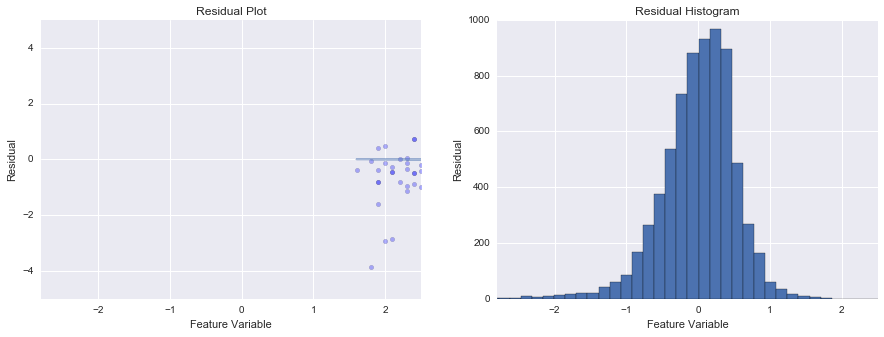

In [21]:
# Residual Plots 

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(X.iloc[:,1],X.iloc[:,1]*0,alpha = .5)
plt.scatter(X.iloc[:,1], y_pred-y, alpha = .3)
plt.xlabel('Feature Variable')
plt.ylabel('Residual')
plt.xlim([-2.8,2.5])
plt.title('Residual Plot');

plt.subplot(1,2,2)
plt.hist(y_pred-y,bins = 50)
plt.xlabel('Feature Variable')
plt.ylabel('Residual')
plt.xlim([-2.8,2.5])
plt.title('Residual Histogram');

The residual looks much more normally distributed. 

## Exercise 3.3 

In [47]:
# Movie genre (Action) as categorical variable 

y = finalfinal_meta3.RT_Audience_2
ones = (finalfinal_meta3.IMDB_User_Rating*0+1)
ones = ones.rename('bias')
X = pd.concat([ones,finalfinal_meta3.IMDB_User_Rating, finalfinal_meta3.Romance], axis=1)
model = sm.OLS(y, X) 
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          RT_Audience_2   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     4495.
Date:                Sun, 16 Oct 2016   Prob (F-statistic):               0.00
Time:                        17:57:20   Log-Likelihood:                -5527.7
No. Observations:                7117   AIC:                         1.106e+04
Df Residuals:                    7114   BIC:                         1.108e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
bias                 2.3755      0.041     58.082      0.000         2.295     2.456
IMDB_User_Rating     0.6444      0.007     94.410      0.000         0.631     0.658
Romance              0.0526      0.018      2.899      0.004         0.017     0.088
==============================================================================
Omnibus:                     1327.226   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5389.908
Skew:                           0.874   Prob(JB):                         0.00
Kurtosis:                       6.888   Cond. No.                         40.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The categorical variable (Romance) was significant. 

In [48]:
y_pred = fit.predict(X)
print(metrics.r2_score(y, y_pred))

0.558222087141


Given Romance was a significant feature, it improved our model a bit. 

## Exercise 3.4

In [53]:
# Improving the model 

y = finalfinal_meta3.RT_Audience_2
X = pd.concat([finalfinal_meta3.IMDB_User_Rating, finalfinal_meta3.Action, finalfinal_meta3.Romance,finalfinal_meta3.Fantasy], axis=1)
model = sm.OLS(y, X) 
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          RT_Audience_2   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.697e+05
Date:                Sun, 16 Oct 2016   Prob (F-statistic):               0.00
Time:                        18:01:55   Log-Likelihood:                -6889.8
No. Observations:                7117   AIC:                         1.379e+04
Df Residuals:                    7113   BIC:                         1.382e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
IMDB_User_Rating     1.0302      0.002    642.123      0.000         1.027     1.033
Action               0.0973      0.019      5.171      0.000         0.060     0.134
Romance              0.0748      0.022      3.339      0.001         0.031     0.119
Fantasy              0.0845      0.024      3.464      0.001         0.037     0.132
==============================================================================
Omnibus:                     2303.825   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14292.948
Skew:                           1.407   Prob(JB):                         0.00
Kurtosis:                       9.347   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The r-squared value significanlty improved with additional feature variables. 

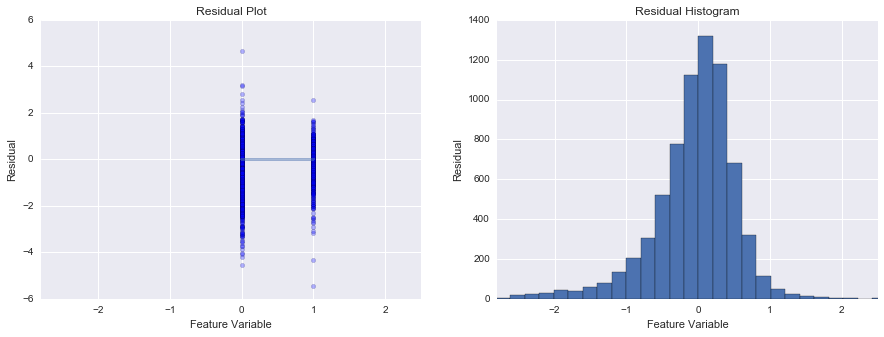

In [55]:
# Plots of Residual 

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.scatter(X.iloc[:,1], y_pred-y,alpha = .3)
plt.plot(X.iloc[:,1],X.iloc[:,1]*0,alpha = .5)
plt.xlabel('Feature Variable')
plt.ylabel('Residual')
plt.xlim([-2.8,2.5])
plt.title('Residual Plot');

plt.subplot(1,2,2)
plt.hist(y_pred-y,bins = 50)
plt.xlabel('Feature Variable')
plt.ylabel('Residual')
plt.xlim([-2.8,2.5])
plt.title('Residual Histogram');

Again, as evident from the plots, the residuals are normally distributed. 

## Exercise 3.5

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [59]:
lreg = LinearRegression()
lreg.fit(X_train,y_train)
lreg.score(X_test, y_test)

model1 = lreg

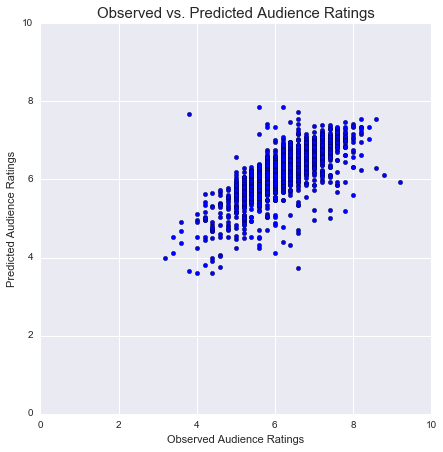

In [62]:
plt.figure(figsize=(7,7))
plt.title('Observed vs. Predicted Audience Ratings', fontsize=15)
plt.ylim(0,10)
plt.xlim(0,10)
plt.xlabel('Observed Audience Ratings')
plt.ylabel ('Predicted Audience Ratings')
plt.scatter(y_test, y_predict)